In [38]:
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')

nltk.download("stopwords")
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /Users/paul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/paul/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/paul/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/paul/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /Users/paul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/paul/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/paul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Read in Tweets
For this example, we have a CSV with tweets. I'll just read it in using Pandas so it will handle punctuation and quotation marks easily.

We only want tweets in Enlish.

And we want them in one big long string.

In [65]:
import pandas as pd
df = pd.read_csv('tweets.csv')
en = df[df['language'] == 'English']
phrase = "\n".join(list(en['content']))

# clone  https://github.com/fivethirtyeight/russian-troll-tweets.git, using google colab
!git clone https://github.com/fivethirtyeight/russian-troll-tweets.git

"""
russian-troll-tweets
├── IRAhandle_tweets_1.csv
├── IRAhandle_tweets_2.csv
├── IRAhandle_tweets_3.csv
...
├── IRAhandle_tweets_13.csv
"""

# read tweets
def get_iratweets():
       # Read all the files in the directory
       files = os.listdir('IRAhandle_tweets')
       for file in files:
            df = pd.read_csv('IRAhandle_tweets/' + file)
            en = df[df['language'] == 'English']
            phrase = "\n".join(list(en['content']))
            # Create a list of all the words in the tweets
            words = []
            for tweet in get_iratweets['content']:
                        words += word_tokenize(tweet)
            # Create a list of all the nouns in the tweets
            nouns = []
            for word in words:
                        if word[0].isupper():
                                nouns.append(word)
            # Return the nouns
            return nouns

# 2. Tokenize
Break the huge long string into separate words using punctuation and spaces to separate words.

In [ ]:
words = word_tokenize(phrase)

# 3. Lemmatize
The "lemmatizer" does the work of converting words to their simpler form.  For instance, converting plurals (e.g., families) into singulars (e.g., family)

In [ ]:
lem_words = [lemmatizer.lemmatize(word) for word in words]

# 4. Remove Junk Words

In [ ]:
good_words = [word for word in lem_words if word.casefold() not in stop_words]

# 5. Get Just the Nouns
NLTK knows how to identify different Enlish parts of speach. Since we want to know _what_ is being talked about, let's focus just on the Nouns and Named Entities.

In [ ]:
tags = nltk.pos_tag(good_words)
noun_words = [ t[0] for t in tags if t[1] in ('NN','NE') and len(t[0]) > 2 ]

# 7. Look at "top 20"

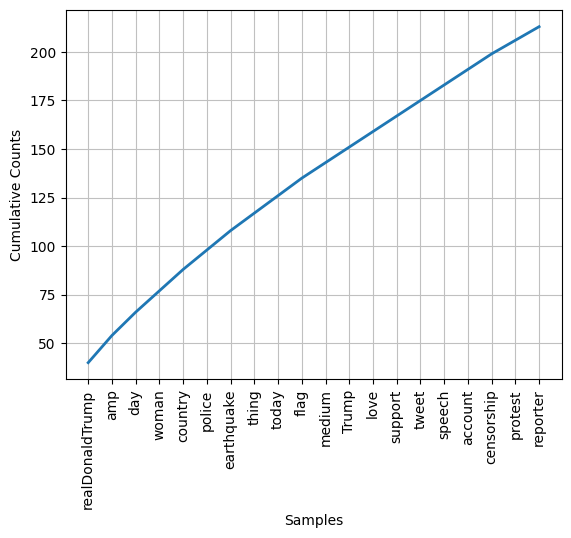

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [68]:
distribution = FreqDist(noun_words)
distribution.plot(20, cumulative=True)

In [69]:
distribution.most_common(20)

[('realDonaldTrump', 40),
 ('amp', 14),
 ('day', 12),
 ('woman', 11),
 ('country', 11),
 ('police', 10),
 ('earthquake', 10),
 ('thing', 9),
 ('today', 9),
 ('flag', 9),
 ('medium', 8),
 ('Trump', 8),
 ('love', 8),
 ('support', 8),
 ('tweet', 8),
 ('speech', 8),
 ('account', 8),
 ('censorship', 8),
 ('protest', 7),
 ('reporter', 7)]